# Amazon Bestselling - EDA & Rating Predictions(97%)

This notebook is about the Amazon Top 50 Bestselling Books 2009 – 2019. The Dataset contains 550 books. Data has been categorized into fiction and non-fiction using Goodreads. The analysis of this Dataset will allow us have a deep understanding of the book market trends over the past decade.


The dataset includes seven categories, such as Name of the Book, Author of the Book, User Rating, Number of Reviews, the Price of the Book. The Year(s) it ranked on the bestseller and whether Fiction or Non-Fiction.

__Content:__
1. Data Exploration
1. Data Visulaistion
1. Data Preprocessing
1. Building Random Forest Model

__Features:__ <br>
1. __Name:__ Name of the Book <br>
1. __Author:__ The Author of the Book <br>
1. __User Rating:__ Amazon User Rating <br>
1. __Reviews:__ Number of Reviews on Amazon <br>
1. __Price:__ The Price of the Book <br>
1. __Year:__ The Year(s) It Ranked on the Bestseller <br>
1. __Genre:__ Whether Fiction or Non-fiction <br>

# Questions to Be Answered with the Dataset

1. What Is the Rating Distribution for the Books?
1. Which Category Has a Wider Range and Distribution?
1. What Is Price Distribution? 
1. What Is Reviews Distribution?
1. Who Has Written the Most Books?
1. What Is the Number of Books Per Rating?
1. Which Year Has the Highest User Rating?
1. Which Year Has the Highest Reviews?
1. What is the Price Variation Through Time?
1. What Are the Highest Reviewed Books?
1. What Are the Lowest Reviewed Books?
1. What Are the Worst Rated Books?
1. What Are the Most Expensive Books?
1. What Are the Cheapest Books?
1. What Are the Best 10 Free Books?
1. Who Are the Most Popular Authors?

In [1]:
# import necessary libraries
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# set the color palette
sns.set_palette(sns.color_palette('deep'))
sns.set(rc = {'figure.figsize': (9, 5)})
sns.set_style('whitegrid')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read the csv file
df = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

# Data Exploration

In [5]:
# show first few records
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
# get the number of records and columns
df.shape

(550, 7)

In [7]:
# get concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
# check missing values
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [9]:
# check duplicate values
df.duplicated().sum()

0

In [10]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [11]:
# range of prices
np.sort(df['Price'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        27,  28,  30,  32,  36,  39,  40,  42,  46,  52,  53,  54,  82,
       105])

Well, zero price would mean that amazon distributed those books for free, lets show these books labeled with zero price.

In [12]:
df[df['Price'] == 0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


# Data Visulaistion

## What Is the Rating Distribution for the Books?

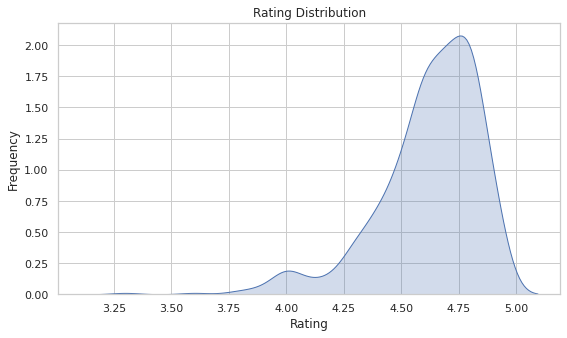

In [13]:
# ratings distribution
sns.kdeplot(df['User Rating'], shade = True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency');

## Which Category Has a Wider Range and Distribution?

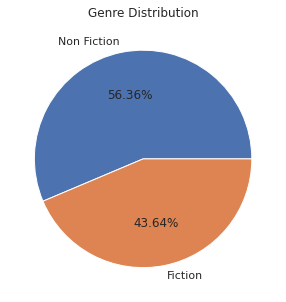

In [14]:
# genre distribution
plt.pie(df['Genre'].value_counts(), autopct = '%1.2f%%', labels = df['Genre'].value_counts().index)
plt.title('Genre Distribution');

## What Is Price Distribution? 

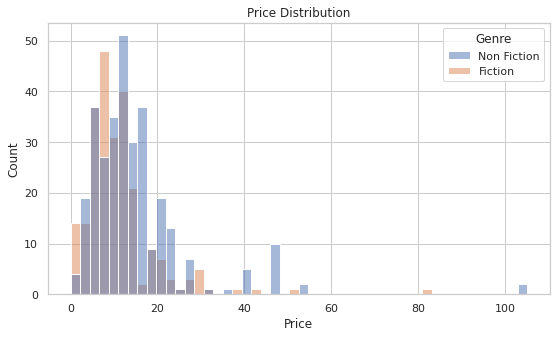

In [15]:
# price distribution
plt.title('Price Distribution')
sns.histplot(x = 'Price', hue = 'Genre', data = df);

## What Is Reviews Distribution?

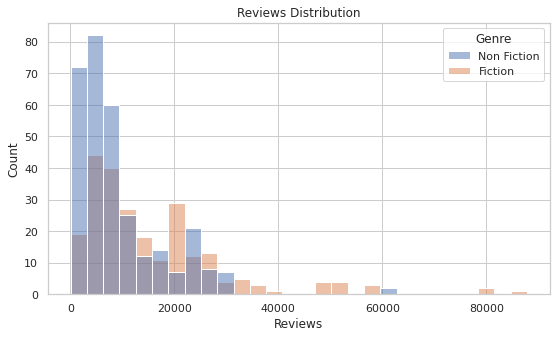

In [16]:
# reviews distribution
plt.title('Reviews Distribution')
sns.histplot(x = 'Reviews', hue = 'Genre', data = df);

## Who Has Written the Most Books?

In [17]:
# authors with most books
most_books = df['Author'].value_counts().head(10)
most_books

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Bill O'Reilly                          7
Stephen R. Covey                       7
Name: Author, dtype: int64

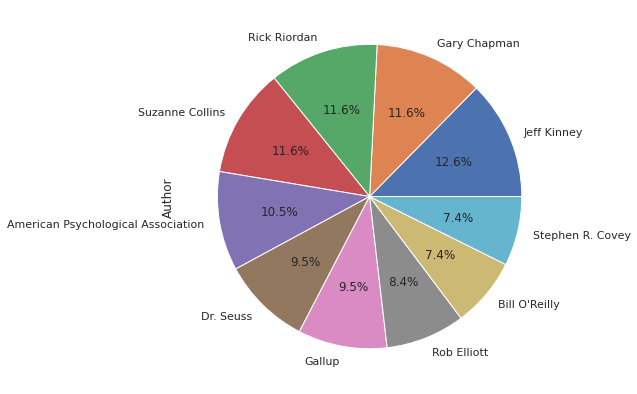

In [18]:
# visualise authors with most books
most_books.plot(kind = 'pie', autopct = '%1.1f%%', figsize = (7, 7));

## What Is the Number of Books Per Rating?

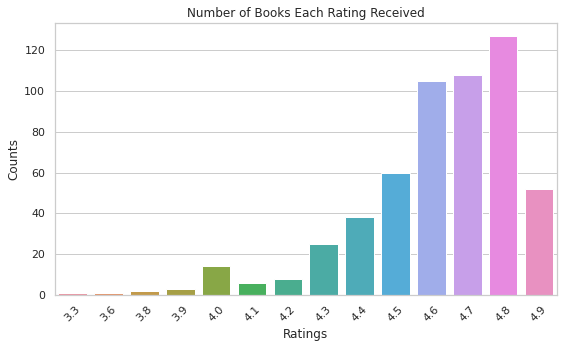

In [19]:
# number of books per rating?
sns.barplot(df['User Rating'].value_counts().index, df['User Rating'].value_counts())
plt.title('Number of Books Each Rating Received')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation = 45);

## Which Year Has the Highest User Rating?

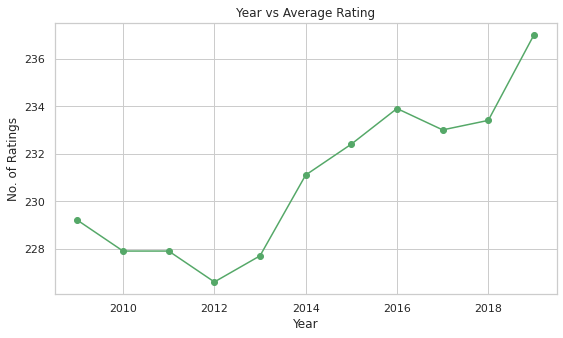

In [20]:
# year with highest rating
df.groupby('Year')['User Rating'].sum().plot(marker = 'o', c = 'g')
plt.title('Year vs Average Rating')
plt.xlabel('Year')
plt.ylabel('No. of Ratings');

## Which Year Has the Highest Reviews?

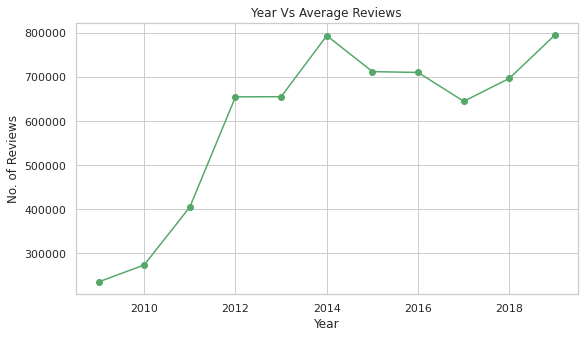

In [21]:
# year with highest reviews
df.groupby('Year')['Reviews'].sum().plot(marker = 'o', c = 'g')
plt.title('Year Vs Average Reviews')
plt.xlabel('Year')
plt.ylabel('No. of Reviews');

## What is the Price Variation Through Time?

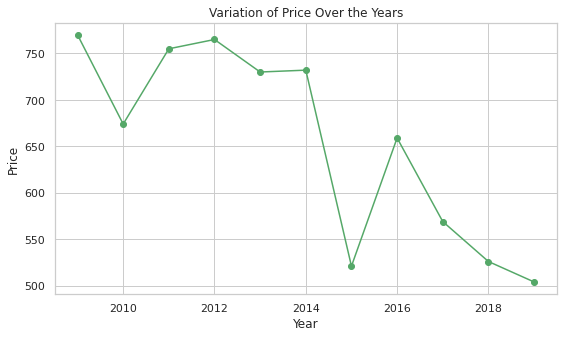

In [22]:
# price variation over the time
df.groupby('Year')['Price'].sum().plot(marker = 'o', c = 'g')
plt.title('Variation of Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Price');

## What Are the Highest Reviewed Books?

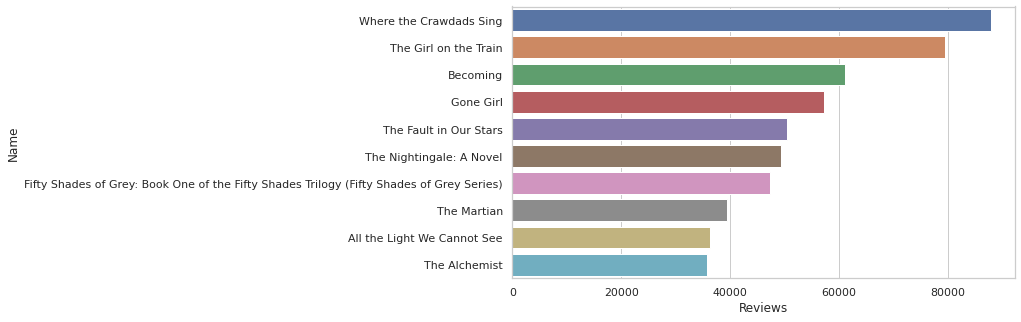

In [23]:
# top reviewed books
top_reviews = df.nlargest(20, ['Reviews'])
sns.barplot(top_reviews['Reviews'], top_reviews['Name']);

## What Are the Lowest Reviewed Books?

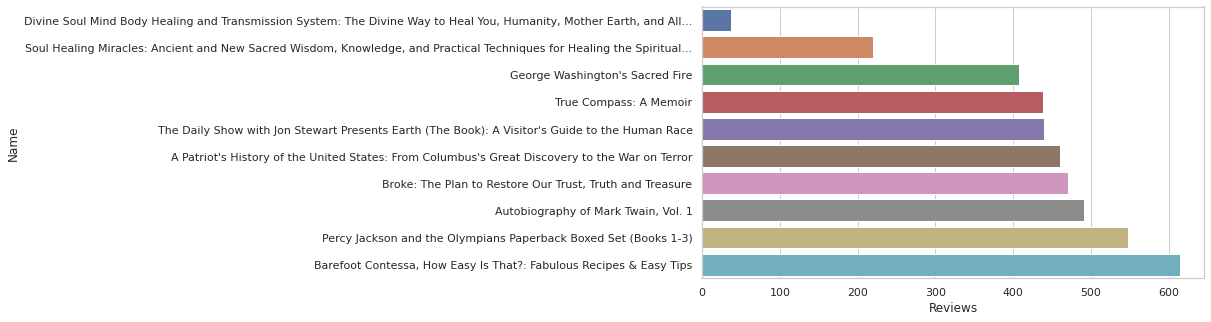

In [24]:
# lowest reviewed books
lowest_reviews = df.nsmallest(10, ['Reviews'])
sns.barplot(lowest_reviews['Reviews'], lowest_reviews['Name']);

## What Are the Worst Rated Books?

In [25]:
# worst rated books
worst = df.sort_values('User Rating').head(10)
worst

,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2014,Fiction
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013,Fiction
364,The Elegance of the Hedgehog,Muriel Barbery,4.0,1859,11,2009,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction


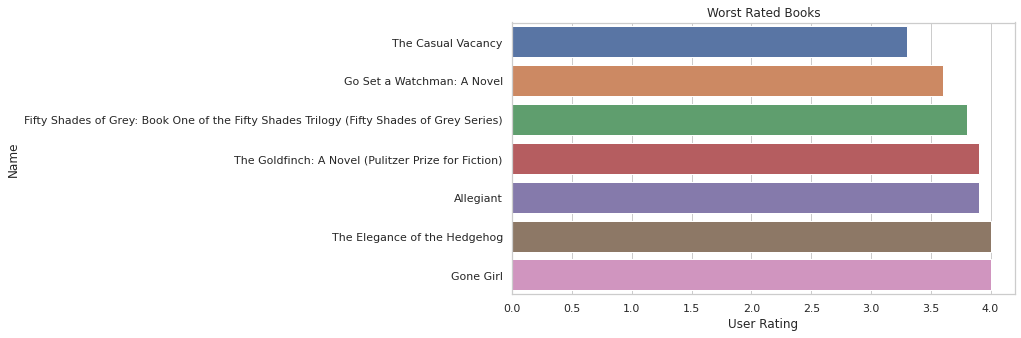

In [26]:
# visualise worst rated books
plt.title('Worst Rated Books')
sns.barplot(y = worst['Name'], x = worst['User Rating']);

## What Are the Most Expensive Books?

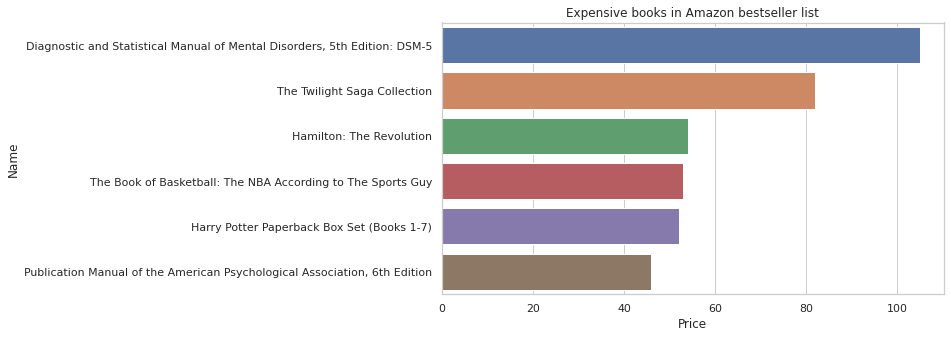

In [27]:
# top expensive books
plt.title('Expensive books in Amazon bestseller list')
top_expensive = df.drop(df[df['Price'] < 1].index).sort_values('Price', ascending = False).head(10)
sns.barplot(y = top_expensive['Name'], x = top_expensive['Price']);

## What Are the Cheapest Books?

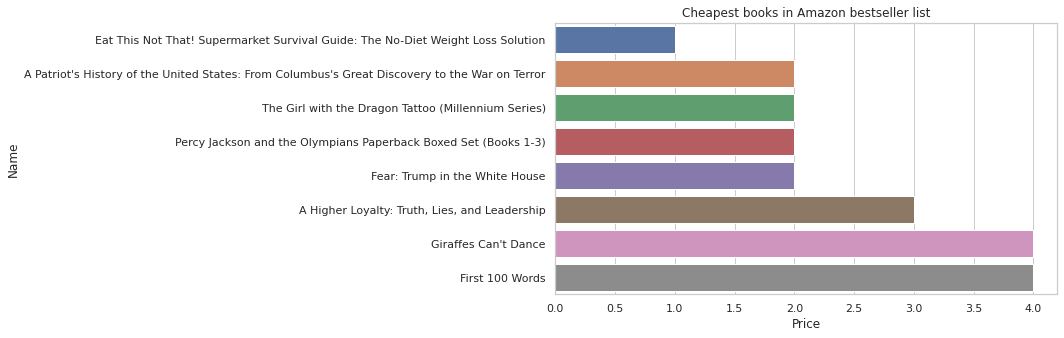

In [28]:
# cheapest books
plt.title('Cheapest books in Amazon bestseller list')
cheapest = df[-df['Price'].isin([0])].sort_values('Price').head(10)
sns.barplot(y = cheapest['Name'], x = cheapest['Price']);

## What Are the Best 10 Free Books?

In [29]:
# top free books
df.drop(df[df['Price'] > 0].index).sort_values('User Rating', ascending = False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
508,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2016,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction


## Who Are the Most Popular Authors?

In [30]:
# most popular authors
authors = df.groupby('Author').agg({'User Rating':'mean', 'Reviews':'sum', 'Name': 'count'}).rename({'Name': 'Total Books'}, axis = 1)
authors.sort_values(['User Rating', 'Reviews'], ascending = (False, False)).head(10)

,User Rating,Reviews,Total Books
Author,,,
Emily Winfield Martin,4.9,35368,4
Bill Martin Jr.,4.9,28688,2
Sherri Duskey Rinker,4.9,14076,2
Jill Twiss,4.9,11881,1
Rush Limbaugh,4.9,10986,2
Nathan W. Pyle,4.9,9382,1
Chip Gaines,4.9,7861,1
Lin-Manuel Miranda,4.9,5867,1
Patrick Thorpe,4.9,5396,1


# Data Preprocessing

In [31]:
# encode genre and author columns
le = preprocessing.LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
df['Author'] = le.fit_transform(df['Author'])

In [32]:
# sentiment analyse for name column
df['Name'] = df['Name'].apply(lambda x: x.lower())
df['Name'] = df['Name'].str.replace('[^\w\s]','')

In [33]:
# calculate negative, positive, neutral and compound values
score = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Name'].apply(lambda x : score.polarity_scores(x))
df['Neutral'] = df['Sentiment'].apply(lambda x : x['neu'])
df['Positive'] = df['Sentiment'].apply(lambda x : x['pos'])
df['Negative'] = df['Sentiment'].apply(lambda x : x['neg'])
df['Compound'] = df['Sentiment'].apply(lambda x : x['compound'])
# df = df.drop(columns = ['Sentiment'])
df = df.drop(columns = ['Sentiment', 'Name'])

We know the dataset is not yet a scaled value, we gonna do it after splitting to prevent data leakage as the mean and standard deviation used to normalise the data will be based on the full dataset and not the training subset — therefore leaking information about the testset into the training set.

# Modelling

In [34]:
# split the dataset into features and target
X = df.drop('User Rating', 1)
y = df['User Rating']

In [35]:
# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [36]:
# standardise data values into a standard format
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Into the Woods 😄

In [37]:
# instantiate model with 1000 decision trees
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [38]:
# train the model on training data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [39]:
# use the forest's predict method on the testset
y_pred = model.predict(X_test)

In [40]:
# show actual values vs predicted values
predictions = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
predictions.head()

,Actual,Predicted
195,4.6,4.5867
79,4.7,4.5838
480,4.9,4.8760
109,4.2,4.6344
522,4.8,4.6750


In [41]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 0.13683296703296186
Mean Squared Error (MSE): 0.04219211923076986
Root Mean Squared Error (RMSE): 0.2054072034539438


In [42]:
# calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))

Mean Absolute Percentage Error (MAPE): 3.12


In [43]:
# calculate accuracy
print('Accuracy:', round(100*(1 - mape), 2), '%')

Accuracy: 96.88 %
